<a href="https://colab.research.google.com/github/AKSHYATA15/classification-of-galaxies-using-MobileNet/blob/main/galaxy_class_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.5 MB/s eta 0:00:00
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284593 sha256=54c04f4d841d1fc0823c57fba37d6e12b54ba18e1e23f7902ed218877e6c54b2
  Stored in directory: /root/.cache/pip/wheels/f2/b6/1f/222aea123a5de8a34c3dd95bb73dca35e342ef3901328e9db0
Successfully built astroNN


In [ ]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

In [ ]:
! pip install certifi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:


images, labels = galaxy10.load_data()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge',
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [ ]:
! pip install --upgrade certifi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_train.shape, x_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3))

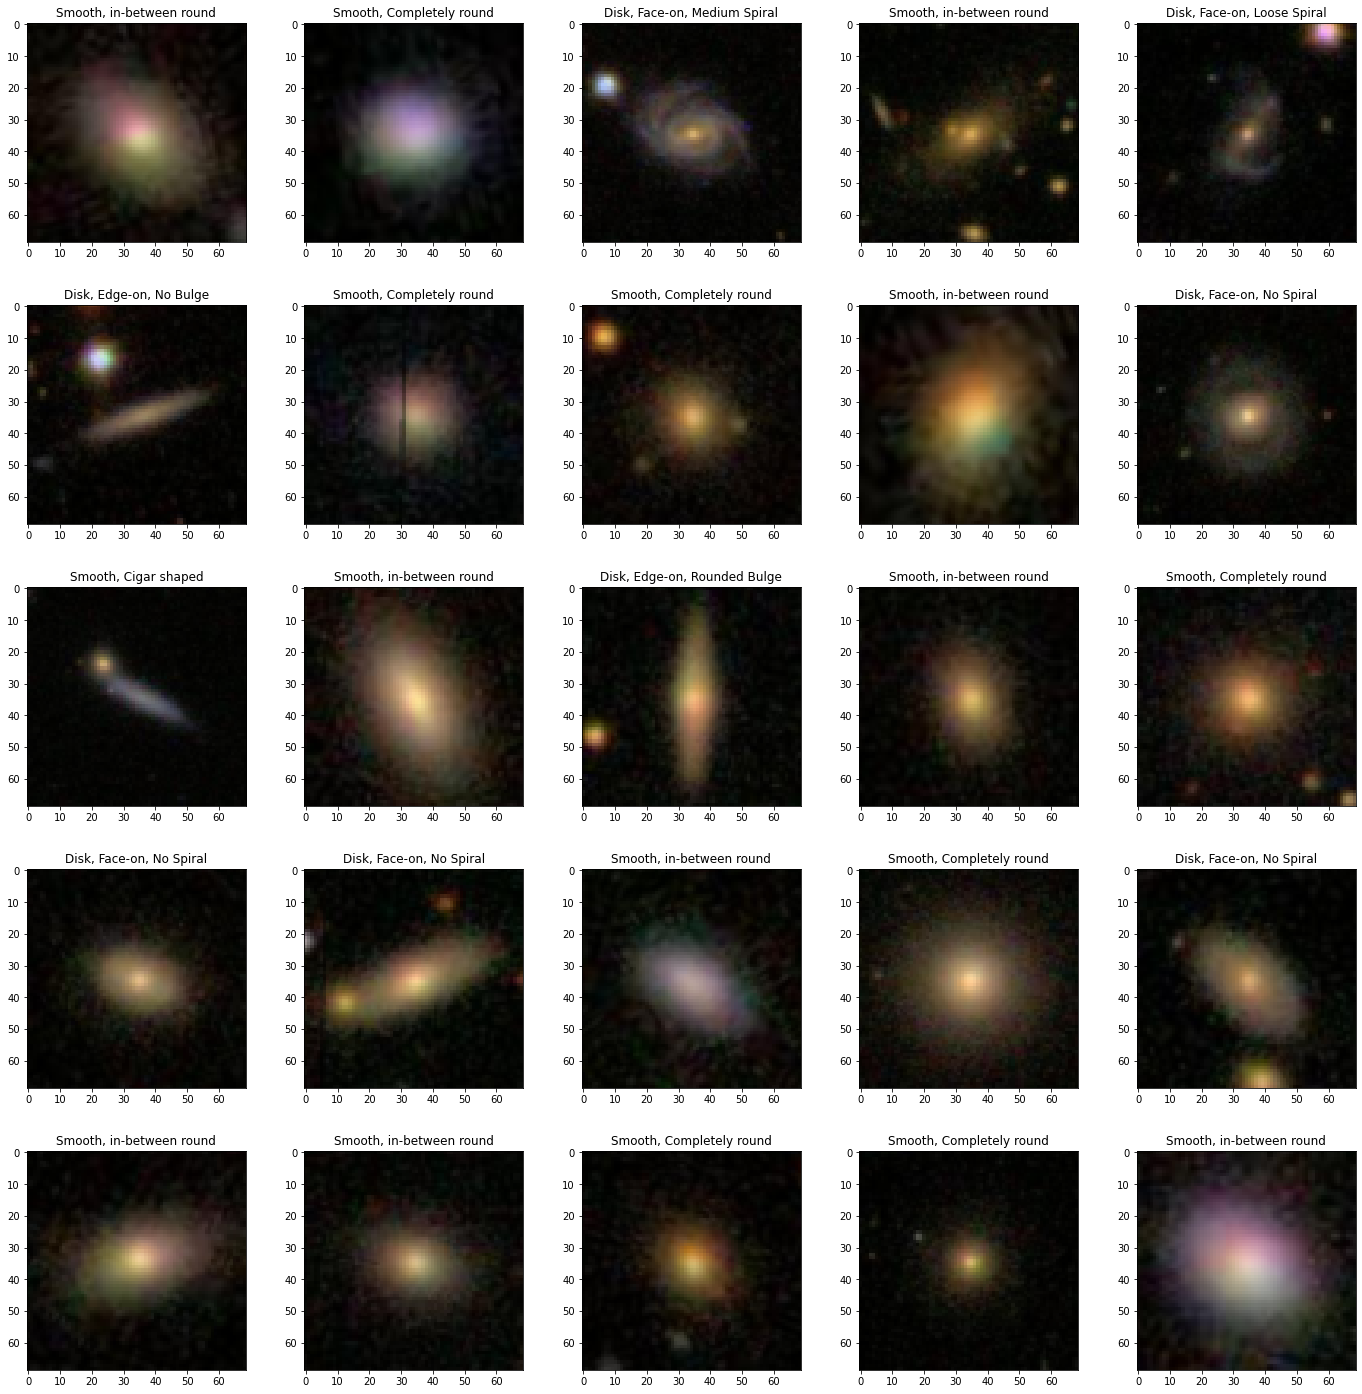

In [ ]:
fig = plt.figure(figsize=(20,20))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)

plt.show()

In [ ]:
# Check class distribution

df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


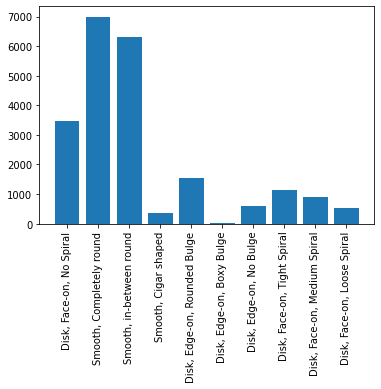

In [ ]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()

class_distribution(features, counts, features)

In [ ]:
import keras
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization
from keras.layers import concatenate, GlobalAvgPool2D, Dropout, DepthwiseConv2D ,ReLU
from keras.models import Model

import keras.backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
def mobilenet(input_shape , n_classes):

  def mobilenet_block(x , filters , strides=1):
    x = DepthwiseConv2D(3,strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

  input = Input( input_shape)

  #stem of the model
  x = Conv2D( filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)


  #main part of the model
  x = mobilenet_block(x , 64 ,1)
  x = mobilenet_block(x , 128 ,2)
  x = mobilenet_block(x , 128 ,1)
  x = mobilenet_block(x , 256 ,2)
  x = mobilenet_block(x , 256 ,1)
  x = mobilenet_block(x , 512 ,2)

  for i in range(5):
    x = mobilenet_block(x, filters = 512, strides = 1)

  x = mobilenet_block(x, filters = 1024, strides = 2)
  x = mobilenet_block(x, filters = 1024, strides = 1)
  x = GlobalAvgPool2D()(x)
  output = Dense (n_classes, activation = 'softmax')(x)

  model = Model(inputs=input, outputs=output)


  return model

In [ ]:
INPUT_SHAPE = 69, 69, 3
N_CLASSES = 10

K.clear_session()
model = mobilenet(INPUT_SHAPE , N_CLASSES)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 69, 69, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 35, 35, 32)        896       
                                                                 
 depthwise_conv2d (Depthwise  (None, 35, 35, 32)       320       
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 35, 35, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 35, 35, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        2112  

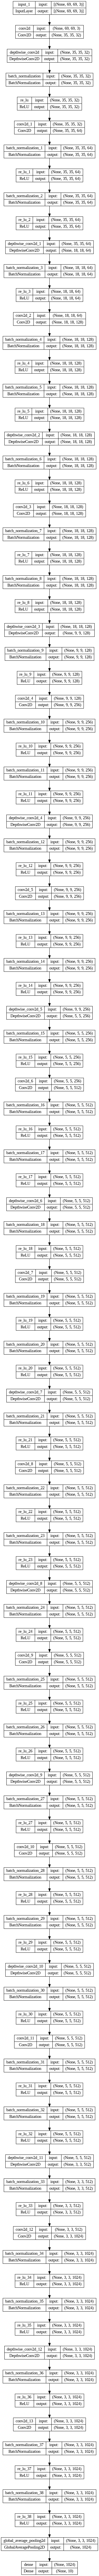

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

In [ ]:
model_optimizer = Adam(lr=0.001)

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train, y_train, epochs=10, batch_size= 100 , callbacks=[reduceLR])

Epoch 1/10
  5/175 [..............................] - ETA: 7:12 - loss: 1.6499 - accuracy: 0.4100

KeyboardInterrupt: ignored

In [ ]:
predict = model.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 33s 228ms/step
Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Loose Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.61      0.39      0.48       657\n           1       0.92      0.84      0.88      1399\n           2       0.80      0.83      0.82      1285\n           3       0.28      0.53      0.37        76\n           4       0.51      0.95      0.66       300\n           5       0.00      0.00      0.00         4\n           6       0.93      0.42      0.58       119\n           7       0.47      0.76      0.58       252\n           8       0.52      0.31      0.39       173\n           9       0.52      0.24      0.33        92\n\n    accuracy                           0.72      4357\n   macro avg       0.56      0.53      0.51      4357\nweighted avg       0.75      0.72      0.72      4357\n'

Text(33.0, 0.5, 'True class')

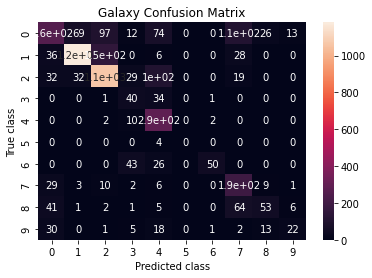

In [ ]:
matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, annot=True)
plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')